In [12]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import requests
# Import API key
from api_keys import api_key

# Citipy
from citipy import citipy

# Cities Output File 
output_file = "output/cities.csv"

# Range of lat/lng
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
lat_lngs = []
cities = []

# Random to reduce bias
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Nearby City 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Is the city unique
    if city not in cities:
        cities.append(city)
        
len(cities)


620

## Perform API Calls

In [14]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []



In [ ]:
#counters
record_counter = 0
set_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('{} of {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("Error")
        pass

print('-------------------------')

In [17]:
# Weather Dictionary
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          575
Cloudiness    575
Country       575
Humidity      575
Temp          575
Lat           575
Lng           575
Wind Speed    575
dtype: int64

In [18]:
weather_data.head(15)


,City,Cloudiness,Country,Humidity,Temp,Lat,Lng,Wind Speed
0,butaritari,85,KI,66,85.17,3.07,172.79,9.95
1,klaksvik,37,FO,75,46.40,62.23,-6.59,21.92
2,mahebourg,40,MU,88,73.99,-20.41,57.70,5.82
3,jamestown,0,AU,15,83.44,-33.21,138.60,22.28
4,solnechnyy,100,RU,70,68.70,50.72,136.64,5.08
5,hermanus,100,ZA,81,57.99,-34.42,19.24,5.99
6,airai,0,TL,35,91.52,-8.93,125.41,5.12
7,cape town,0,ZA,93,60.01,-33.93,18.42,2.24
8,luderitz,0,NA,81,53.60,-26.65,15.16,3.36
9,urengoy,100,RU,94,38.46,65.96,78.37,9.75


In [20]:
cities_list = (new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# Output Path
output_file = os.path.join('..', 'output', 'cities.csv')

with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)


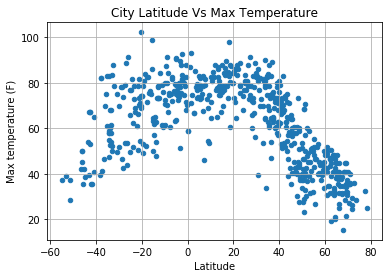

In [22]:
# Latitude Vs Temperature Plot

weather_data.plot(kind='scatter', x='Lat', y='Temp')
plt.title('City Latitude Vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../Images/LatitudeVsTemperature.png")

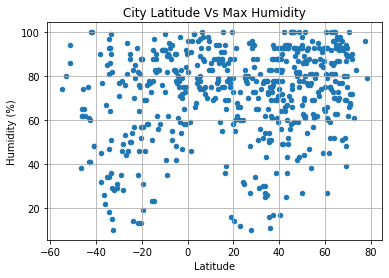

In [23]:
# Latitude Vs Humidity

weather_data.plot(kind='scatter',x='Lat',y='Humidity')
plt.title('City Latitude Vs Max Humidity' )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsHumidity.png")

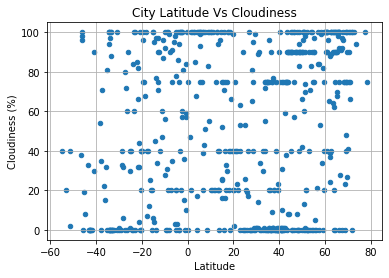

In [24]:
# Latitude Vs Cloudiness

weather_data.plot(kind='scatter',x='Lat',y='Cloudiness')
plt.title('City Latitude Vs Cloudiness' )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsCloudiness.png")

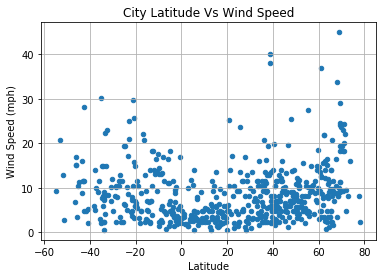

In [25]:
# Latitude Vs Wind Speed

weather_data.plot(kind='scatter',x='Lat',y='Wind Speed')
plt.title('City Latitude Vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../Images/LatitudeVsWindSpeed.png")

Three Observable Trends in the Data:
1) In the Latitude Vs Temperature Plot it is clear that the farther away a location is from the lattitude then the lower the temperature. This graph shows proof that at the equater (0) the temperature is the highest
2) In the Latitude Vs Cloudiness Plot there is no clear correlation between the two variables. So from this plot it is safe to assume that lattiude does not impact the cloudiness.
3)In the Latitude Vs Wind Speed it seems like there is no clear correlation. Regardless of what the lattitude is, the wind speed for a majority of the cities is 0 mph to 20 mph. 